# Laboratório 3

Neste laboratório, vamos aplicar um pouco da teoria e prática que vimos ao longo das semanas três e quatro da disciplina.

A ideia principal é que vamos trabalhar um pouco mais com os novos classificadores vistos, métricas de avaliação e seleção de hiperparâmetros.

Assim como nos Laboratório 01 e 02, vamos utilizar o conjunto de dados ``College``, disponível [aqui](https://www.statlearning.com/resources-python).

Só para lembrar, o conjunto de dados contém informações sobre várias faculdades e universidades dos Estados Unidos. O significado de cada informação não é essencial para este exercício. Mas alguns exemplos de informações contidas no conjunto de dados são:

- `Private`: Indica se a instituição é pública ou privada
- `Apps`: Número de aplicações recebidas
- `Accept`: Número de aplicações aceitas
- `Enroll`: Número de novos alunos matriculados
- `Top10perc`: Percentual de novos alunos do top 10% de turmas do ensino médio
- `Top25perc`: Percentual de novos alunos do top 25% de turmas do ensino médio
- ...

## Obtenção dos dados

Para obter o conjunto de dados, execute o comando abaixo. O arquivo ``College.csv`` será diretamente acessível por meio desse *notebook*.

**Observação:** caso a sessão do *notebook* seja interrompida, será necessário baixar o conjunto de dados novamente.

In [86]:
!wget https://www.statlearning.com/s/College.csv

--2025-03-02 11:37:30--  https://www.statlearning.com/s/College.csv
Resolving www.statlearning.com (www.statlearning.com)... 198.185.159.144, 198.49.23.145, 198.185.159.145, ...
Connecting to www.statlearning.com (www.statlearning.com)|198.185.159.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe064464c2528214f6bde/1610604644365/College.csv [following]
--2025-03-02 11:37:31--  https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe064464c2528214f6bde/1610604644365/College.csv
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.248.238
Connecting to static1.squarespace.com (static1.squarespace.com)|151.101.248.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74924 (73K) [text/csv]
Saving to: ‘College.csv.2’

College.csv.2       100%[===================>]  73.17K  --.-KB/s    in 0.03s   

2025-03-02 11:37:32 (2.18 MB/s) -

**ATENÇÃO:** você não deve remover ou adicionar células no restante deste *notebook*.

Sempre escreva suas respostas nas células indicadas!

## Leitura e Preparação dos Dados [Não vale pontos, mas é necessário]

Repita a Parte I do Laboratório 01. Ou seja, prepare o conjunto de dados seguindo as instruções dos Itens 1.1 a 1.7 daquele Laboratório.

In [87]:
# Escreva sua resposta aqui
import pandas as pd
df = pd.read_csv("College.csv")
df.rename(columns={df.columns[0]: "College"}, inplace=True)
df = df.set_index("College")
df["Good School"] = (df["Top10perc"] > 25).astype(int)
y = df["Good School"].copy()
df.drop(columns=["Top10perc", "Top25perc", "Good School"], inplace=True)
df["Private"] = (df["Private"] == "Yes").astype(int)
df.head()

,Private,Apps,Accept,Enroll,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Ao final da preparação, o *Data Frame* deve se parecer com o mostrado abaixo.

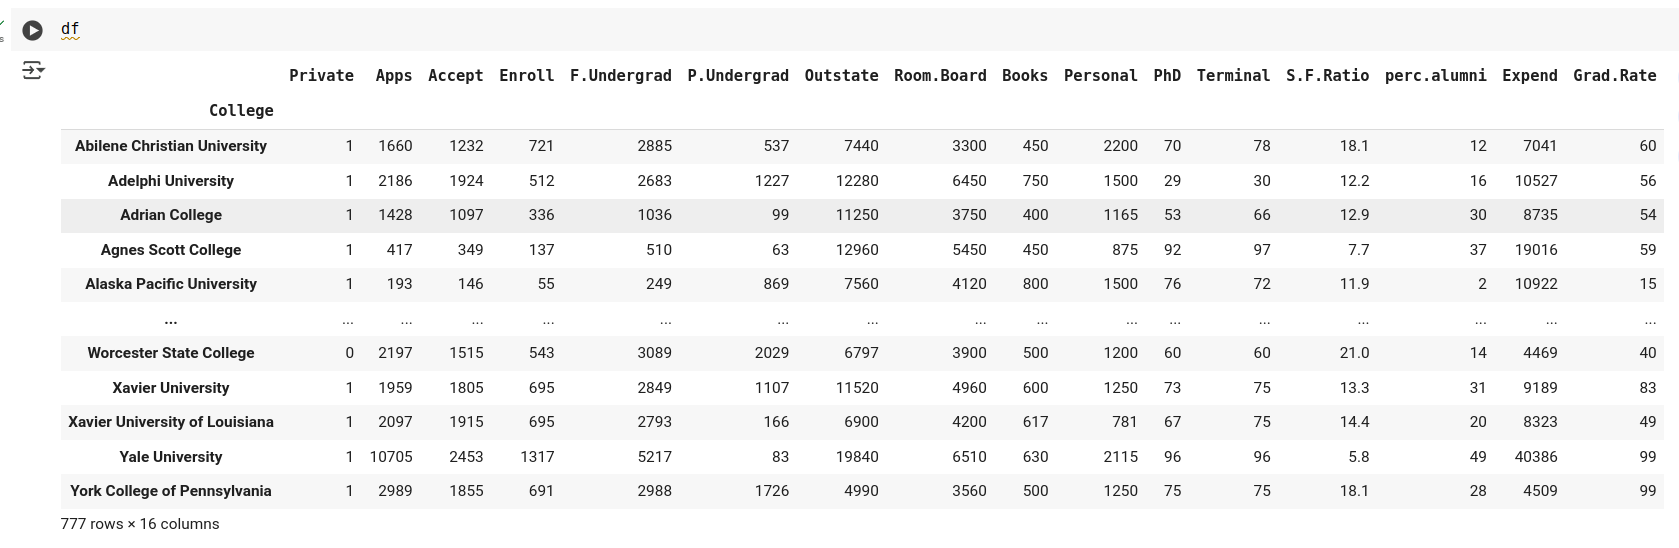

## Parte 1: Comparando os Classificadores [50 pontos - Todos os itens têm o mesmo valor]

Assim como nos Laboratórios 01 e 02, a tarefa de predição aqui será prever a variável `y` em função dos dados contidos no *Data Frame* resultante na parte anterior do laboratório.

Ou seja, o objetivo é criar um modelo para classificar se uma instituição de ensino é uma `Good School` ou não.

### Divisão em conjuntos de treinamento e teste.

Divida o conjunto de dados em porções distintas para treinamento e avaliação do classificador.

25% do conjunto de dados deve ser retido para testes.

Essa mesma divisão deverá ser utilizada no restante do laboratório.

O Código fornecido abaixo realiza essa separação para você e não deve ser alterado.

In [88]:
# não modifique esse código.

from sklearn.model_selection import train_test_split

X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Item 1.1

Use os Classificadores [KNN](https://scikit-learn.org/1.6/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Árvore de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) e [Floresta Aleatória](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) no conjunto de dados acima. Ou seja:
1. Treine os seis classificadores em `X_train` e `y_train`. Nesse momento, você **não** deve aplicar nenhuma transformação nos dados (e.g. padronização ou reescala). Além disso, não forneça nenhum parâmetro aos classificadores (todos os hiperparâmetros devem ser os padrões da `scikit-learn`);
2. Use cada um dos classificadores para prever os rótulos dos elementos do conjunto de teste, `X_test` (nessa etapa, não é necessário avaliar os classificadores).

In [89]:
# Escreva sua resposta aqui

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Acurácia do KNN %4f" %(acc_knn))

#Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive = naive_bayes.predict(X_test)
acc_naive = accuracy_score(y_test, y_pred_naive)
print("Acurácia do Naive Bayes %4f" %(acc_naive))

#Regressão Logística
#Acontece erro de iteracoes, mas funciona
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred_reg = reg_log.predict(X_test)
acc_reg = accuracy_score(y_test, y_pred_reg)
print("Acurácia da Regressão Log. %4f" %(acc_reg))

#Árvore de decisão
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Acurácia da Árvore de Dec. %4f" %(acc_tree))

#Floresta aleatoria
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Acurácia da Floresta aleatória. %4f" %(acc_rf))

#Adaboost (usando arvore de decisao)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(tree, n_estimators = 1001)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_rf)
print("Acurácia do Adaboost. %4f" %(acc_ada))

Acurácia do KNN 0.748718
Acurácia do Naive Bayes 0.758974
Acurácia da Regressão Log. 0.728205
Acurácia da Árvore de Dec. 0.748718


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia da Floresta aleatória. 0.810256
Acurácia do Adaboost. 0.810256


### Item 1.2

Para cada classificador treinado, imprima o [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) do classificador relativo aos rótulos preditos no conjunto de teste.

In [90]:
from sklearn.metrics import classification_report

print('\t\tKNN\n', classification_report(y_test, y_pred_knn))
print('\t\tDecision Tree\n', classification_report(y_test, y_pred_tree))
print('\t\tNaive Bayes\n', classification_report(y_test, y_pred_naive))
print('\t\tLogistic Regression\n', classification_report(y_test, y_pred_reg))
print('\t\tAdaBoost\n', classification_report(y_test, y_pred_ada))
print('\t\tRandom Forest\n', classification_report(y_test, y_pred_rf))

		KNN
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       107
           1       0.75      0.67      0.71        88

    accuracy                           0.75       195
   macro avg       0.75      0.74      0.74       195
weighted avg       0.75      0.75      0.75       195

		Decision Tree
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       107
           1       0.73      0.69      0.71        88

    accuracy                           0.75       195
   macro avg       0.75      0.74      0.74       195
weighted avg       0.75      0.75      0.75       195

		Naive Bayes
               precision    recall  f1-score   support

           0       0.75      0.85      0.79       107
           1       0.78      0.65      0.71        88

    accuracy                           0.76       195
   macro avg       0.76      0.75      0.75       195
weighted avg       0.76      0.76  

### Item 1.3

Com base nos resultados do item anterior, há algum classificador que se destaca?

Lembre, é importante observar todas as métricas, não apenas a acurácia.

**Resposta:** A floresta aleatória se destacou, visto que suas métricas estão acima dos demais classificadores (na média de classificação de cada classe (0 e 1))

### Item 1.4

Faça uma única figura contendo a [Curva ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) dos seis classificadores treinados.

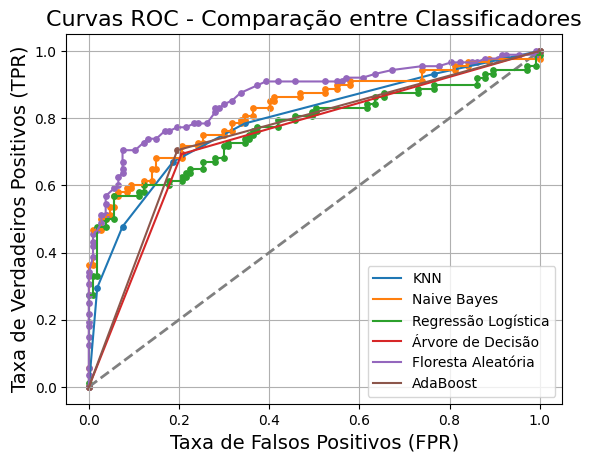

In [91]:
# Escreva sua resposta aqui
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_knn = knn.predict_proba(X_test)[:, 1]
y_pred_nb = naive_bayes.predict_proba(X_test)[:, 1]
y_pred_reg_log = reg_log.predict_proba(X_test)[:, 1]
y_pred_tree = tree.predict_proba(X_test)[:, 1]
y_pred_random_forest = random_forest.predict_proba(X_test)[:, 1]
y_pred_ada = ada.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_nb)
fpr_reg_log, tpr_reg_log, thresholds_reg_log = roc_curve(y_test, y_pred_reg_log)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_tree)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_random_forest)
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_ada)


# Linha de aleatoriedade (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.scatter(fpr_knn, tpr_knn, s=15)

plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.scatter(fpr_nb, tpr_nb, s=15)

plt.plot(fpr_reg_log, tpr_reg_log, label="Regressão Logística")
plt.scatter(fpr_reg_log, tpr_reg_log, s=15)

plt.plot(fpr_tree, tpr_tree, label="Árvore de Decisão")
plt.scatter(fpr_tree, tpr_tree, s=15)

plt.plot(fpr_rf, tpr_rf, label="Floresta Aleatória")
plt.scatter(fpr_rf, tpr_rf, s=15)

plt.plot(fpr_ada, tpr_ada, label="AdaBoost")
plt.scatter(fpr_ada, tpr_ada, s=15)

plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=14)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=14)
plt.title('Curvas ROC - Comparação entre Classificadores', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Item 1.5

Com base nos resultados da Figura do Item 1.4, há classificadores que se destacam?

**Resposta:** Sim, a Floresta aleatória está com os pontos mais próximos de 1 no eixo TPR, o adaboost também.

### Item 1.6

Compute e imprima a [Área sob a Curva Roc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) para os seis classificadores.

In [92]:
from sklearn.metrics import auc
print("Auc KNN: %.4f" %(auc(fpr_knn, tpr_knn)))
print("Auc Naive Bayes: %.4f" %(auc(fpr_nb, tpr_nb)))
print("Auc Regressão Logística: %.4f" %(auc(fpr_reg_log, tpr_reg_log)))
print("Auc Àrvore de Decisão: %.4f" %(auc(fpr_tree, tpr_tree)))
print("Auc Floresta Aleatória: %.4f" %(auc(fpr_ada, tpr_ada)))
print("Auc Adaboost: %.4f" %(auc(fpr_ada, tpr_ada)))


Auc KNN: 0.7908
Auc Naive Bayes: 0.8238
Auc Regressão Logística: 0.7718
Auc Àrvore de Decisão: 0.7438
Auc Floresta Aleatória: 0.7541
Auc Adaboost: 0.7541


### Item 1.7

Com base nos resultados dos Itens 1.2 e 1.6, os valores de AUC estão de acordo com sua interpretação das métricas de avaliação e das Curva ROC?

**Resposta:** Não... Agora parece que o Naive Bayes se desta, com uma precisão de 82%, seguido pelo KNN com 79%

### Item 1.8

Repita o experimento dos Itens 1.1, 1.2, 1.4 e 1.6.

No entanto, dessa vez, você deve aplicar a transformação por reescala nos dados. Lembre, o `scaler` deve ser ajustado ao conjunto de treinamento e posteriormente aplicado ao conjunto de teste.

**Atenção:**
- O conjunto de treinamento transformado deve ser armazenado na variável `X_train_scaled`.
- Similarmente, o conjunto de teste transformado, deve ser armazenado na variável `X_test_scaled`.

In [93]:
# Escreva sua resposta aqui
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

#Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive = naive_bayes.predict(X_test)

#Regressão Logística
#Acontece erro de iteracoes, mas funciona
reg_log = LogisticRegression()
reg_log.fit(X_train_scaled, y_train)
y_pred_reg = reg_log.predict(X_test_scaled)

#Árvore de decisão
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

#Floresta aleatoria
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

#Adaboost (usando arvore de decisao)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(tree, n_estimators = 1001)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

Kelvin digitando aqui: Só lembrando que nem todos os classificadores precisam usar os dados reescalados, mas se usar, não tem problema. Vamos usar com todos na segunda parte do lab

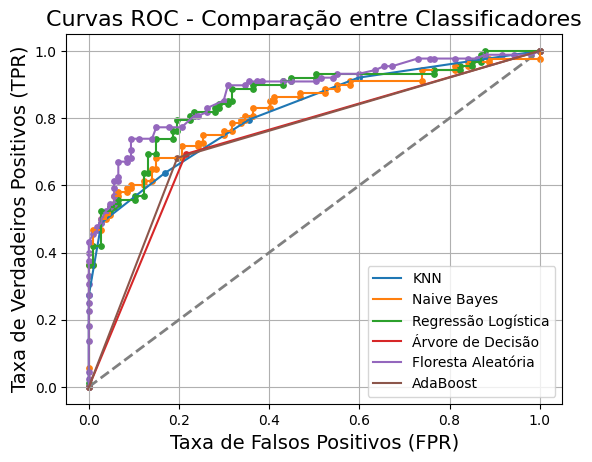

In [94]:
# Escreva sua resposta aqui
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

#usando o scaled
y_pred_knn = knn.predict_proba(X_test_scaled)[:, 1]
y_pred_reg_log = reg_log.predict_proba(X_test_scaled)[:, 1]

y_pred_nb = naive_bayes.predict_proba(X_test)[:, 1]
y_pred_tree = tree.predict_proba(X_test)[:, 1]
y_pred_random_forest = random_forest.predict_proba(X_test)[:, 1]
y_pred_ada = ada.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_nb)
fpr_reg_log, tpr_reg_log, thresholds_reg_log = roc_curve(y_test, y_pred_reg_log)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_tree)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_random_forest)
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_ada)


# Linha de aleatoriedade (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.scatter(fpr_knn, tpr_knn, s=15)

plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.scatter(fpr_nb, tpr_nb, s=15)

plt.plot(fpr_reg_log, tpr_reg_log, label="Regressão Logística")
plt.scatter(fpr_reg_log, tpr_reg_log, s=15)

plt.plot(fpr_tree, tpr_tree, label="Árvore de Decisão")
plt.scatter(fpr_tree, tpr_tree, s=15)

plt.plot(fpr_rf, tpr_rf, label="Floresta Aleatória")
plt.scatter(fpr_rf, tpr_rf, s=15)

plt.plot(fpr_ada, tpr_ada, label="AdaBoost")
plt.scatter(fpr_ada, tpr_ada, s=15)

plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=14)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=14)
plt.title('Curvas ROC - Comparação entre Classificadores', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [95]:
from sklearn.metrics import auc
print("Auc KNN: %.4f" %(auc(fpr_knn, tpr_knn)))
print("Auc Naive Bayes: %.4f" %(auc(fpr_nb, tpr_nb)))
print("Auc Regressão Logística: %.4f" %(auc(fpr_reg_log, tpr_reg_log)))
print("Auc Àrvore de Decisão: %.4f" %(auc(fpr_tree, tpr_tree)))
print("Auc Floresta Aleatória: %.4f" %(auc(fpr_ada, tpr_ada)))
print("Auc Adaboost: %.4f" %(auc(fpr_ada, tpr_ada)))

Auc KNN: 0.8177
Auc Naive Bayes: 0.8238
Auc Regressão Logística: 0.8567
Auc Àrvore de Decisão: 0.7391
Auc Floresta Aleatória: 0.7428
Auc Adaboost: 0.7428


### Item 1.9

Com base nos resultados do Item 1.8, para o conjunto de dados utilizado e para os classificadores treinados, há evidência de que a transformação por reescala impactou significativamente os resultados?

**Resposta:** Sim, impactou, o KNN saiu de 79% para 81%, enquanto a regressão logística saiu de 77% para 85%!

## Parte 2 - Seleção de Hiperparâmetros [50 pontos - Todos os itens têm o mesmo valor]

Na segunda parte do Laboratório, vamos praticar um pouco sobre como escolher hiperparâmetros sem correr o risco de gerar *overfitting*.

### Item 2.1

Para isso, você deve utilizar o módulo [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Lembre, nenhuma informação do conjunto de teste deve ser utilizada na fase de treinamento e validação cruzada.

Você deve considerar os seis classificadores vistos até o momento (e já utilizados neste Laboratório). Para cada um deles, considere os seguintes conjuntos de hiperparâmetros candidatos:
- $k$ do **KNN** -- $k \in \{1, 2, 3, \dots, 30\}$.
- $C$ da **Regressão Logística** -- comumente, para isso, utiliza-se valores espaçados exponencialmente. Assim, utilize a função [`logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) da biblioteca `numpy` para criar 30 valores espaçados exponencialmente de 0.001 a 1000.
- Profundidade da **Árvore de Decisão** -- considere os valores em $\{2, 4, 6, \dots, 30\}$.
- `var_smoothin` do **Gaussian Naive Bayes** -- comumente, para isso, utiliza-se valores espaçados exponencialmente. Assim, utilize a função [`logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) da biblioteca `numpy` para criar 30 valores espaçados exponencialmente de $10^{-11}$ a $10^{11}$.
- número de estimadores do **AdaBoost** -- considere os valores $\{10, 100, 500, 1000\}$.
- número de estimadores e profundidade máxima da **Floresta Aleatória** -- considere os valores $\{10, 100, 500, 1000\}$ para o número de estimadores e $\{2, 4, 6, \dots, 30\}$ para profundidade máxima.

Nesse momento, vocês devem realizar a validação cruzada e treinamento dos modelos.

**Observação:** Na Parte 2 do Laboratório, vocês devem usar os dados transformados por reescala (i.e., `X_train_scaled` e `X_test_scaled`).

In [96]:
# Escreva sua resposta aqui
import numpy as np
from sklearn.model_selection import GridSearchCV
# Definir os parâmetros de busca para cada modelo
param_grid_knn = {'n_neighbors': np.arange(1, 31)}
param_grid_reg_log = {'C': np.logspace(-3, 3, 30)}  # Espaçado exponencialmente de 0.001 a 1000
param_grid_tree = {'max_depth': np.arange(2, 31, 2)}
param_grid_nb = {'var_smoothing': np.logspace(-11, 11, 30)}  # Espaçado exponencialmente de 10^-11 a 10^11
param_grid_ada = {'n_estimators': [10, 100, 500, 1000]}
param_grid_rf = {'n_estimators': [10, 100, 500, 1000], 'max_depth': np.arange(2, 31, 2)}

knn = KNeighborsClassifier()
log_reg = LogisticRegression()
tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()
ada = AdaBoostClassifier()
random_forest = RandomForestClassifier()

lista_melhores_parametros = []

knn_grid = GridSearchCV(knn, param_grid_knn, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)
lista_melhores_parametros.append(knn_grid.best_params_)

reg_log_grid = GridSearchCV(log_reg, param_grid_reg_log, n_jobs=-1)
reg_log_grid.fit(X_train_scaled, y_train)
lista_melhores_parametros.append(reg_log_grid.best_params_)

tree_grid = GridSearchCV(tree, param_grid_tree, n_jobs=-1)
tree_grid.fit(X_train_scaled, y_train)
lista_melhores_parametros.append(tree_grid.best_params_)

nb_grid = GridSearchCV(naive_bayes, param_grid_nb, n_jobs=-1)
nb_grid.fit(X_train_scaled, y_train)
lista_melhores_parametros.append(nb_grid.best_params_)

ada_grid = GridSearchCV(ada, param_grid_ada, n_jobs=-1)
ada_grid.fit(X_train_scaled, y_train)
lista_melhores_parametros.append(ada_grid.best_params_)

rf_grid = GridSearchCV(random_forest, param_grid_rf, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
lista_melhores_parametros.append(rf_grid.best_params_)

print(lista_melhores_parametros)




[{'n_neighbors': np.int64(20)}, {'C': np.float64(0.010826367338740546)}, {'max_depth': np.int64(4)}, {'var_smoothing': np.float64(1e-11)}, {'n_estimators': 100}, {'max_depth': np.int64(10), 'n_estimators': 100}]


### Item 2.2

Imprima os melhores hiperparâmetros, encontrados pelo processo de validação cruzada, para cada classificador.

In [97]:
# Escreva sua resposta aqui
for hyper in lista_melhores_parametros:
    print(hyper)

{'n_neighbors': np.int64(20)}
{'C': np.float64(0.010826367338740546)}
{'max_depth': np.int64(4)}
{'var_smoothing': np.float64(1e-11)}
{'n_estimators': 100}
{'max_depth': np.int64(10), 'n_estimators': 100}


### Item 2.3

Utilize os modelos treinados no Item 2.1 para prever os rótulos dos elementos do conjunto de teste (`X_test_scaled`).

Após isso, imprima o `classification_report` de cada classificador.

In [98]:
y_pred_knn_grid = knn_grid.predict(X_test_scaled)
y_pred_reg_log_grid = reg_log_grid.predict(X_test_scaled)
y_pred_tree_grid = tree_grid.predict(X_test_scaled)
y_pred_nb_grid = nb_grid.predict(X_test_scaled)
y_pred_ada_grid = ada_grid.predict(X_test_scaled)
y_pred_rf_grid = rf_grid.predict(X_test_scaled)

print('\t\tKNN\n', classification_report(y_test, y_pred_knn_grid))
print('\t\tDecision Tree\n', classification_report(y_test, y_pred_tree_grid))
print('\t\tNaive Bayes\n', classification_report(y_test, y_pred_nb_grid))
print('\t\tLogistic Regression\n', classification_report(y_test, y_pred_reg_log_grid))
print('\t\tAdaBoost\n', classification_report(y_test, y_pred_ada_grid))
print('\t\tRandom Forest\n', classification_report(y_test, y_pred_rf_grid))

		KNN
               precision    recall  f1-score   support

           0       0.75      0.93      0.83       107
           1       0.89      0.61      0.72        88

    accuracy                           0.79       195
   macro avg       0.82      0.77      0.78       195
weighted avg       0.81      0.79      0.78       195

		Decision Tree
               precision    recall  f1-score   support

           0       0.72      0.92      0.81       107
           1       0.85      0.57      0.68        88

    accuracy                           0.76       195
   macro avg       0.78      0.74      0.74       195
weighted avg       0.78      0.76      0.75       195

		Naive Bayes
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       107
           1       0.81      0.66      0.72        88

    accuracy                           0.77       195
   macro avg       0.78      0.76      0.77       195
weighted avg       0.78      0.77  

### Item 2.4

Faça uma única figura contendo a [Curva ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) dos seis classificadores treinados no Item 2.1.

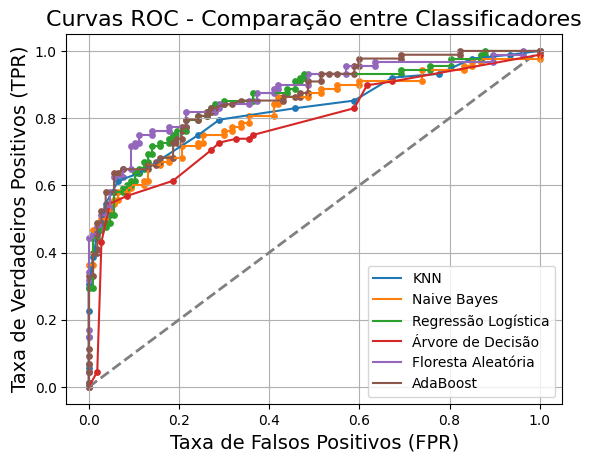

In [101]:
# Escreva sua resposta aqui
y_pred_knn = knn_grid.predict_proba(X_test_scaled)[:, 1]
y_pred_nb = nb_grid.predict_proba(X_test_scaled)[:, 1]
y_pred_reg_log = reg_log_grid.predict_proba(X_test_scaled)[:, 1]
y_pred_tree = tree_grid.predict_proba(X_test_scaled)[:, 1]
y_pred_random_forest = rf_grid.predict_proba(X_test_scaled)[:, 1]
y_pred_ada = ada_grid.predict_proba(X_test_scaled)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_nb)
fpr_reg_log, tpr_reg_log, thresholds_reg_log = roc_curve(y_test, y_pred_reg_log)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_tree)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_random_forest)
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_ada)


# Linha de aleatoriedade (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.scatter(fpr_knn, tpr_knn, s=15)

plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.scatter(fpr_nb, tpr_nb, s=15)

plt.plot(fpr_reg_log, tpr_reg_log, label="Regressão Logística")
plt.scatter(fpr_reg_log, tpr_reg_log, s=15)

plt.plot(fpr_tree, tpr_tree, label="Árvore de Decisão")
plt.scatter(fpr_tree, tpr_tree, s=15)

plt.plot(fpr_rf, tpr_rf, label="Floresta Aleatória")
plt.scatter(fpr_rf, tpr_rf, s=15)

plt.plot(fpr_ada, tpr_ada, label="AdaBoost")
plt.scatter(fpr_ada, tpr_ada, s=15)

plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=14)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=14)
plt.title('Curvas ROC - Comparação entre Classificadores', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Item 2.5

Compute e imprima a [Área sob a Curva Roc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) para os seis classificadores.

In [102]:
# Escreva sua resposta aqui
print("Auc KNN: %.4f" %(auc(fpr_knn, tpr_knn)))
print("Auc Naive Bayes: %.4f" %(auc(fpr_nb, tpr_nb)))
print("Auc Regressão Logística: %.4f" %(auc(fpr_reg_log, tpr_reg_log)))
print("Auc Àrvore de Decisão: %.4f" %(auc(fpr_tree, tpr_tree)))
print("Auc Floresta Aleatória: %.4f" %(auc(fpr_ada, tpr_ada)))
print("Auc Adaboost: %.4f" %(auc(fpr_ada, tpr_ada)))


Auc KNN: 0.8241
Auc Naive Bayes: 0.8216
Auc Regressão Logística: 0.8573
Auc Àrvore de Decisão: 0.7796
Auc Floresta Aleatória: 0.8645
Auc Adaboost: 0.8645


### Item 2.6

Com base nos resultados da Parte 2, para o conjunto de dados utilizado e para os classificadores treinados, há evidência de que a seleção de hiperparâmetros (com validação cruzada) impactou significativamente os resultados?

**Resposta:** Sim, impactou. Todos os classificadores aumentaram a sua pontuação, tendo destaque a regressão logística e a floresta aleatória!

O classificador que teve menos impacto foi a árvore de decisão (levando em consideraçã a área sob a curva)